In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url_data = "https://raw.githubusercontent.com/MNafiz/dashboard-dicoding-bangkit-2024/main/data/PRSA_Data_Changping_20130301-20170228.csv"

In [ ]:
"""
Pertanyaan yang ingin dijawab melalui eksplorasi dan visulasisasi
1. kapan nilai NO2 bernilai tinggi ?
2. kapan nilai NO2 bernilai rendah ?
3. Berapa periodenya jika memiliki siklus musiman?
"""

In [2]:
df = pd.read_csv(url_data)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [9]:
df.loc[df["NO2"].isnull()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
28,29,2013,3,2,4,14.0,18.0,24.0,NaN,400.0,45.0,-3.4,1027.5,-17.0,0.0,NW,0.8,Changping
124,125,2013,3,6,4,149.0,155.0,59.0,NaN,2500.0,81.0,2.4,1004.7,-6.2,0.0,N,1.0,Changping
1057,1058,2013,4,14,1,8.0,12.0,3.0,NaN,200.0,94.0,9.4,1004.6,-11.9,0.0,NNW,1.1,Changping
1061,1062,2013,4,14,5,4.0,9.0,3.0,NaN,200.0,92.0,6.7,1005.2,-16.0,0.0,NE,2.4,Changping
1180,1181,2013,4,19,4,42.0,77.0,19.0,NaN,800.0,38.0,6.9,1016.2,-3.1,0.0,ESE,2.5,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34879,34880,2017,2,21,7,NaN,NaN,NaN,NaN,NaN,NaN,-1.7,1023.1,-17.4,0.0,E,1.3,Changping
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-1.8,1023.8,-16.7,0.0,W,1.2,Changping
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,1022.7,-16.0,0.0,ESE,1.9,Changping
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1021.5,-9.4,0.0,SW,1.7,Changping


In [8]:
data_clean = df.dropna().copy()
print(data_clean.shape)
data_clean.head()

(32681, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [20]:
data_clean["date"] = data_clean["year"].astype(str) + "-" + data_clean["month"].astype(str) + "-" + data_clean["day"].astype(str)
data_clean.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-3-1
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-3-1
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-3-1
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-3-1
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-3-1


In [21]:
data_clean["date"] = pd.to_datetime(data_clean["date"])
data_clean.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01


In [22]:
data_max = data_clean[["date", "NO2"]].groupby("date").max()
data_max

,NO2
date,
2013-03-01,42.0
2013-03-02,87.0
2013-03-03,93.0
2013-03-04,91.0
2013-03-05,127.0
...,...
2017-02-24,79.0
2017-02-25,70.0
2017-02-26,83.0


# Menjawab pertanyaan nomor 1

Terlihat bahwa nilai NO2 paling tinggi di kota ChangPing ketika di penghujung tahun (awal tahun atau akhir tahun)

<Axes: xlabel='date'>

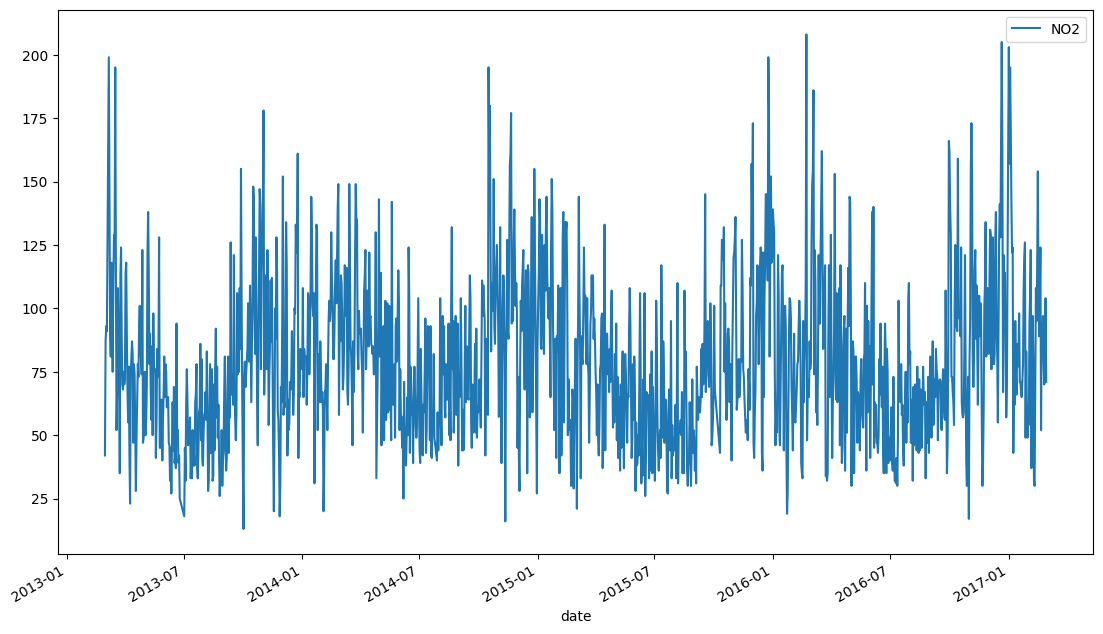

In [24]:
data_max.plot.line(figsize=(8 * 1.67, 8))

In [25]:
data_min = data_clean[["date", "NO2"]].groupby("date").min()
data_min

,NO2
date,
2013-03-01,6.0
2013-03-02,16.0
2013-03-03,16.0
2013-03-04,9.0
2013-03-05,36.0
...,...
2017-02-24,15.0
2017-02-25,11.0
2017-02-26,13.0


# Menjawab pertanyaan nomor 2

Terlihat bahwa nilai NO2 paling rendah di kota ChangPing ketika berada di pertengahan tahun

<Axes: xlabel='date'>

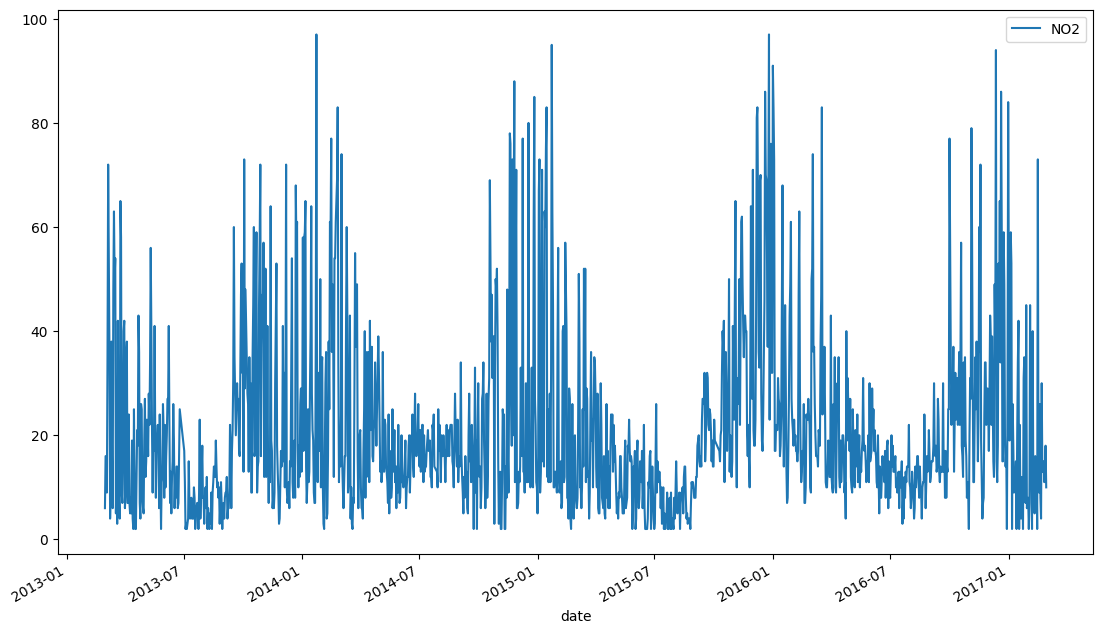

In [26]:
data_min.plot.line(figsize=(8 * 1.67, 8))

# Menjawab pertanyaan nomor 3

Berdasarkan kedua visualisasi tersebut, pola NO2 memiliki siklus musiman yaitu tiap 1 tahun sekali